In [5]:
#Display hel1.pma
import sys
import os
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [6]:
with open('hel1.pma', 'rb') as file:
    data = file.read()
    

In [7]:
def read_pma_f0(file_path):
    """
    Reads a .pma file and extracts multiple binary 512x512 sub-images in left-to-right order.
    Args:
        file_path (str): Path to the .pma file.
    Returns:
        list of numpy arrays: List of 512x512 binary arrays.
    """
    try:
        with open(file_path, "rb") as f:
            #Assign X_pixels and Y_pixels as the first two 16-bit integers in the file
            #<:little-endian (least significant byte first), HH:two 16-bit integers
            X_pixels, Y_pixels = struct.unpack("<HH", f.read(4))
            print(f"Image Size: {X_pixels} x {Y_pixels}")
            
            #Calc number of frames
            f.seek(0, 2) #sets pointer to end of file .seek(offset, from_what)
            filesize = f.tell() #returns current (end) position of file pointer
            Nframes = (filesize - 4) // (X_pixels * Y_pixels)  #Assuming 4-byte header
            f.seek(0, 4) #Reset file pointer to immediately after 4 byte header

            #Read the binary image data
            frame_data = f.read(X_pixels * Y_pixels)
            #Convert the frame data into a 2D numpy array of size (Y_pixels, X_pixels)
            image_data = np.frombuffer(frame_data, dtype=np.uint8).reshape((Y_pixels, X_pixels))

            return image_data

    except Exception as e:
        print(f"Error reading .pma file: {e}")
        return None

Image Size: 512 x 512


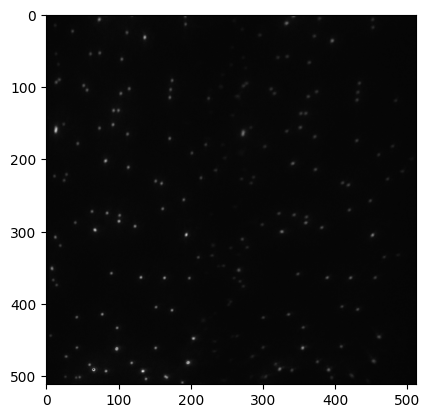

In [8]:
image_data = read_pma_f0("hel1.pma")
plt.imshow(image_data, cmap='gray')
plt.show()
